# Regression Exercises

## Linear

In [ ]:
# Loading data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Read data from Github
data_url = "https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week1/ex1data2.txt"
data_array = np.genfromtxt(data_url, delimiter=',')

# The columns in this data set are define as folows:
"""
    0 = floor area
    1 = number of bedrooms
    2 = sale price
"""
    
# Store the relevant columns in more descriptive variables
x_sqft = data_array[:,0]
y_value = data_array[:,2]

len(x_sqft)

Here we'll build off of the tutorial exercise, first finding the best linear fit for floor area (sqft) vs valued price (USD). Recall that setting the derivative = 0 and solving for 𝑏 & 𝑚 produces formula for the best fit trend:
$$ m = \frac{\sum^n_{i=1} (x_i-x_{mean})(y_i-y_{mean})}{\sum^n_{i=1} (x_i-x_{mean})^2} $$
$$ b = y_{mean}-m*x_{mean} $$

In [ ]:
def find_best_fit(xx,yy):
    '''
      This function finds the best linear fit for yy vs xx
    '''
  
    # YOUR CODE HERE
    x_bar = xx.mean()
    y_bar = yy.mean()

    n = 0
    d = 0
    for i in range(len(xx)):
      n += (xx[i] - x_bar) * (yy[i] - y_bar)
      d += (xx[i] - x_bar) ** 2

    m = n / d
    b = y_bar - m * x_bar 

    return (m, b)

In [ ]:
# Use your function to show the best fit values for our data
(mm, bb) = find_best_fit(x_sqft, y_value)
fit_str = 'y = {aa:.1f}x + {bb:.1f}'
print(fit_str.format(aa=mm,bb=bb))

y = 134.5x + 71270.5


Now we have the best fit trend line that minimizes total error for our data, let's try plotting it and see what it looks like. Since its just an equation, we need to *sample* the curve in order to plot it. To do this, we'll find the difference between the largest and smallest floor area, and divide it into 100 sample points.

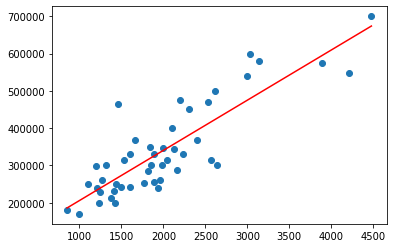

In [ ]:
# Plot the data
plt.scatter(x_sqft, y_value)

# Sample the range from minimum to maximum sqft to get 100 points

x_sample = np.linspace(min(x_sqft), max(x_sqft), num = 100)
# Apply the best fit equation to each sample point and plot the result

y_sample = mm * x_sample + bb 
plt.plot(x_sample, y_sample, 'r')

1: Given these parameters, how much should a house with 1600 sqft cost?

(YOUR ANSWER HERE)

In [ ]:
predicted = mm * (1600) + bb
print(predicted)

286510.9528011152


2: From the dataset, how much did a house with 1600 sqft actually cost?

(YOUR ANSWER HERE)

In [ ]:
res = {x_sqft[i]: y_value[i] for i in range(len(y_value))}
real = res[1600]
print(real)
res

329900.0


{2104.0: 399900.0,
 1600.0: 329900.0,
 2400.0: 369000.0,
 1416.0: 232000.0,
 3000.0: 539900.0,
 1985.0: 299900.0,
 1534.0: 314900.0,
 1427.0: 198999.0,
 1380.0: 212000.0,
 1494.0: 242500.0,
 1940.0: 239999.0,
 2000.0: 347000.0,
 1890.0: 329999.0,
 4478.0: 699900.0,
 1268.0: 259900.0,
 2300.0: 449900.0,
 1320.0: 299900.0,
 1236.0: 199900.0,
 2609.0: 499998.0,
 3031.0: 599000.0,
 1767.0: 252900.0,
 1888.0: 255000.0,
 1604.0: 242900.0,
 1962.0: 259900.0,
 3890.0: 573900.0,
 1100.0: 249900.0,
 1458.0: 464500.0,
 2526.0: 469000.0,
 2200.0: 475000.0,
 2637.0: 299900.0,
 1839.0: 349900.0,
 1000.0: 169900.0,
 2040.0: 314900.0,
 3137.0: 579900.0,
 1811.0: 285900.0,
 1437.0: 249900.0,
 1239.0: 229900.0,
 2132.0: 345000.0,
 4215.0: 549000.0,
 2162.0: 287000.0,
 1664.0: 368500.0,
 2238.0: 329900.0,
 2567.0: 314000.0,
 1200.0: 299000.0,
 852.0: 179900.0,
 1852.0: 299900.0,
 1203.0: 239500.0}

3: Assuming the current 1600 sqft house would sell for as much as the historical one, how much money would we have lost? What percentage of the total price is this?

(YOUR ANSWER HERE)

In [ ]:
loss = real - predicted
precent = loss/real * 100


print(loss, precent)

43389.04719888477 13.152181630459161


Now compare the values for 𝑚 and 𝑏 that sklearn generated in the tutorial notebook with the values that you found just now with your function. Hopefully they match.

In [ ]:
print("Sklearn:",134.52528772, 71270.492448729)
print("My function:",mm,bb)

Sklearn: 134.52528772 71270.492448729
My function: 134.52528772024135 71270.49244872906


---
Remember how despite adding an entire new variable, the $R^2$ value barely increased? Let's investigate this further by finding the correlation ($R^2$) value for a regression of square footage vs. number of bedrooms.

In [ ]:
import sklearn.linear_model as lm

# YOUR CODE HERE
model = lm.LinearRegression()

x_sqft_shaped = x_sqft.reshape(-1,1)
y_bedrooms = data_array[:,1]

# Fit onto the results
housepredictor = model.fit(x_sqft_shaped,y_bedrooms)
housepredictor.score(x_sqft_shaped,y_bedrooms)

0.3135632699338188

Do 2 variables have to be verry correlated to reduce their effectiveness together?

(YOUR ANSWER HERE)

## Logistic

We are going to predict wheter or not someone has breast cancer using Logistic Regression on sklearn's breast cancer dataset. It is up to you to decide what features to get the best results.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
df= pd.DataFrame(data=data['data'], columns=data['feature_names'])

for i in range(len(data['feature_names'])):

    X_cols = [data['feature_names'][i]]
    y_col = 'target'

    print(X_cols)

    # YOUR CODE HERE
    test_size = 0.15
    X_train, X_val, y_train, y_val = train_test_split(df[X_cols], data[y_col], test_size=test_size, random_state=1)

    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    y_train_pred=logreg.predict(X_train)
    print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
    y_val_pred=logreg.predict(X_val)
    print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

['mean radius']
Training Accuracy is  87.5776397515528
Validation Accuracy is  89.53488372093024
['mean texture']
Training Accuracy is  69.77225672877847
Validation Accuracy is  68.6046511627907
['mean perimeter']
Training Accuracy is  88.81987577639751
Validation Accuracy is  87.20930232558139
['mean area']
Training Accuracy is  88.40579710144928
Validation Accuracy is  89.53488372093024
['mean smoothness']
Training Accuracy is  63.14699792960663
Validation Accuracy is  60.46511627906976
['mean compactness']
Training Accuracy is  68.32298136645963
Validation Accuracy is  66.27906976744185
['mean concavity']
Training Accuracy is  79.5031055900621
Validation Accuracy is  72.09302325581395
['mean concave points']
Training Accuracy is  66.87370600414079
Validation Accuracy is  63.95348837209303
['mean symmetry']
Training Accuracy is  63.14699792960663
Validation Accuracy is  60.46511627906976
['mean fractal dimension']
Training Accuracy is  63.14699792960663
Validation Accuracy is  60.465

Test your logistical regression! You must get an accuracy of > 80%

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=867a077d-cc4a-444a-b148-d2ffaf2ad44b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>